Hands-On Workshops / Mathematische Dialoge – WS 2025/26

# LA I – 1: Tutorial für das Symbolisches Rechnen mit Julia 


Herzlich Willkommen in diesem Tutorial Sheet zu den Workshops! Die Bearbeitung dieses Sheets ist für alle Teilnehmer verpflichtend und zählt als erstes von sechs Sheets der Workshops zur Linearen Algebra I. Sie sollten das <b> Tutorial Sheet einmal komplett vom Anfang bis zum Ende bearbeiten </b> und speichern. Die Bearbeitung des Tutorial Sheets ist notwendig, um die kommenden Sheets erfolgreich bearbeiten zu können. <mark> Es werden keinerlei Vorkenntnisse im Programmieren vorausgesetzt, </mark> da im wesentlichen nur gegebene Befehle ausgeführt werden sollen bzw. gegebene Beispiele als Schablone verwendet werden können. Es ist notwendig, auf diesem Sheet einmal die Syntax zu erlernen, sodass Sie sich auf den kommenden Sheets auf die Mathematik hinter den Aufgaben konzentrieren könnt. Das Sheet ist so aufgebaut, dass immer einige neue Befehle eingeführt werden und dann die wichtigsten davon in kurzen Aufgaben selber angewendet werden sollen. Wer zwischendurch selber noch ein weiteres Beispiel rechnen will, kann jederzeit eine neue Code-Zelle einfügen und ein eigenes Beispiel rechnen. Wenn Sie Fragen haben oder Hilfe brauchen, besuchen Sie bitte unsere Fragestunden - gerne auch mehrmals! <b> Wir ermuntern Sie ausdrücklich, in Gruppen zusammen zu arbeiten, empfehlen aber, dass dabei jeder an einem eigenen Rechner arbeitet, </b>  damit auch wirklich jeder mit Julia arbeitet. <mark> Was man nicht selber eingetippt hat, kann man sich auch nicht merken!</mark> 
Wir wünschen Ihnen viel Spaß bei der Bearbeitung dieses Tutorials.

***

<div class="alert alert-block alert-danger">
<b>Inhaltsverzeichnis:</b>
<ul>    
    <li>Rechnen mit symbolischen Variablen</li>   
    <li>Eingabe endlicher Folgen und Mengen</li>   
    <li>Kontrollstrukturen</li> 
    <ul>
        <li>Bedingte Anweisungen und Verzweigungen</li>
        <li>Schleifen</li>
    </ul>
    <li>Funktionen</li> 
    <li>Plots </li> 
    <li>Komplexe Zahlen </li> 
    </ul>
</div>

In [1]:
import Pkg; Pkg.add("SymPy")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`


***

## Erinnerung: grundsätzliche Bedienung

Die grundsätzliche Bedienung eines Sheets wurde Ihnen bereits auf dem ersten Sheet der Analysis 1 erklärt. Hier nochmal ein paar Dinge zu Erinnerung:

<ul>
    <li> Code-Zellen werden mit Shift+Enter ausgeführt. </li>
<li> 
    Wenn mehrere Befehle in einer Zelle untereinander stehen, werden alle ausgeführt aber nur das Ergebnis des letzten angezeigt. Wenn auch das Ergebnis eines vorherigen Befehls aus der gleichen Zelle angezeigt werden soll, muss die entsprechende Rechnung in Klammern gesetzt werden und der Befehl <code>println</code> davor geschrieben werden. 
    </li> 
    <li> <b>Kommentare</b> innerhalb von Code-Zellen müssen mit `#`davor gekennzeichnet werden, damit Julia weiß, dass hier nichts zu rechnen ist. </li>
    <li> Wenn Sie Ihr Sheet als <b> PDF exportieren </b> wollen, ist unserer Erfahrung nach der beste Weg so: oben links unter <i> File </i> dann <i> Save and Export Notebook As... </i> auswählen, und zwar zunächst als HTML Export (nicht PDF!!). Dieser wird in Ihrem Download Ordner gespeichert und wenn Sie die Datei in einem Browser öffnen können Sie sie dort dann als PDF exportieren oder als PDF drucken (z.B. durch Drücken von Strg+P). </li>
    </ul>


***

## Rechnen mit symbolischen Variablen

Wollen wir mit Polynomen rechnen oder eine Gleichung die von einem Parameter $a$ abhängt lösen (mit einer Lösung, die dann ebenfalls von $a$ abhängt), dann müssen wir in Julia zunächst eine symbolische Variable definieren. Im folgenden Beispiel möchten wir den formalen Ausdruck $b:=a^2+2a+1$ definieren. Das definierende Gleich ":=" in der Mathematik wird in Julia grundsätzlich als `=` eingegeben, während man in Julia mit `==` abfragen kann, ob zwei Ausdrücke übereinstimmen. Sind die Variablen einmal definiert, kann man sie übrigens auf dem gesamten Sheet verwenden, sie müssen nicht in jeder Zelle wieder neu definiert werden. 

In [3]:
# bitte diese Zelle einmal ausführen (reinklicken und Shift+Enter)
using SymPy 


In [4]:
a = symbols("a")  # hiermit sagen wir dem Computer, dass a eine Variable sein soll
b = a^2 + 2*a + 1 # alternativ wäre auch die Eingabe a^2+2a+1 gültig (also ohne das *) 

 2          
a  + 2⋅a + 1

Nun können wir beispielsweise $(a^2+2a+1)^2$ berechnen:

In [5]:
b^2

              2
⎛ 2          ⎞ 
⎝a  + 2⋅a + 1⎠ 

Wenn wir das Ergebnis in ausmultiplizierter Form möchten, benötigen wir den Befehl `expand()`:

In [4]:
expand(b^2)

 4      3      2          
a  + 4⋅a  + 6⋅a  + 4⋅a + 1

Umgekehrt können mit `factor()` symbolische Ausdrücke faktorisiert werden:

In [6]:
factor(b)

       2
(a + 1) 

Für Julia sind die beiden Ausdrücke $b$ und $(a+1)^2$ übrigens nicht gleich!

In [6]:
b == (a+1)^2

false

In [7]:
factor(b) == (a+1)^2

true

Das liegt daran, dass Julia die Differenz von selber nicht weiter umformt oder vereinfacht:

In [8]:
b - (a+1)^2

 2                2    
a  + 2⋅a - (a + 1)  + 1

Um zu testen, ob beide Ausdrücke gleich sind, kann mit Hilfe des `simplify` Befehls wie folgt vorgegangen werden:

In [9]:
simplify(b - (a+1)^2) # Wenn Null rauskommt, stimmen die Ausdrücke überein

0

Sollen mehrere Variablen definiert werden, kann das entweder durch mehrere Befehle untereinander oder mit Kommata getrennt in einer Zeile eingegeben werden:

In [10]:
c, d = symbols("c, d") #hier werden zwei Variablen c und d definiert
factor(c^2 - d^2) #und dann können wir damit rechnen, z.B. faktorisieren

(c - d)⋅(c + d)

***

<div class="alert alert-block alert-success">
    
### Aufgabe 1
***
<ul> Definieren Sie sich symbolische Variablen $x$ und $y$ und
     <li> a) Finden Sie mithilfe von <code>expand()</code> eine Formel für $(x+y)^3$
        </li>
        <li> b) Vereinfachen Sie mithilfe von <code>factor()</code> den Ausdruck $\frac{x^3y-x^2y^2+x^2-xy}{x-y}$
        </li>
    </ul>

</div>

In [8]:
#a
x, y = symbols("x, y")
expand((x + y)^3)

 3      2          2    3
x  + 3⋅x ⋅y + 3⋅x⋅y  + y 

In [9]:
#b

factor(expand((x + y)^3) // (x - y))

       3
(x + y) 
────────
 x - y  

***

## Eingabe von endlichen Folgen und Mengen

Eine endliche Folge (die wir im folgenden auch einfach oft mit <i>Array</i> bezeichnen) wird in Julia in eckigen Klammern ` [ ] ` eingegeben, wobei die `[... for ...]` Syntax oft hilfreich ist:

In [10]:
a = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]  #aufzählend definiert
println(a)                               # wir nutzen hier println, da mehrere Ausdrücke aus einer Zelle ausgegeben werden sollen
b = [2i+1 for i = 0:9]                   # gleicher Array, mit for-Syntax definiert
println(b)
a == b

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


true

Nebenbei bemerkt: wir hatten weiter oben im Sheet schon einmal ein $a$ definiert, dort als symbolische Variable. Dies stört Julia aber nicht, mit dieser Code Zelle haben wir es einfach überschrieben und ab jetzt ist a auf dem Sheet der eben definierte Array (solange wir es nicht noch einmal überschreiben). <br> Die Länge eines Arrays kann mit `length()` abgefragt werden:

In [14]:
length(a)

10

Wir können den $i$-ten Eintrag eines Arrays mit `[i]` aufrufen:

In [15]:
a[4]

7

Zwei Arrays können mit `vcat` aneinander gehängt werden:

In [16]:
a = [0,1,2]
b = [0,2,4,6]
println(a)
println(b)
println(vcat(a, b))

[0, 1, 2]
[0, 2, 4, 6]
[0, 1, 2, 0, 2, 4, 6]


Ein Array wird in Julia als geordnetes Tupel behandelt und zwei solcher Tupel stimmen nur überein wenn alle Einträge übereinstimmen (in der richtigen Reihenfolge!). Beispielsweise stimmen die Arrays $[1,0]$ und $[0,1]$ nicht überein:

In [17]:
[0,1] == [1,0]

false

Wenn man dagegen mit (endlichen) Mengen arbeiten möchte, muss man den Array mit dem Befehl `Set()` in eine Menge umwandeln. Umgekehrt kann eine Menge $M$ durch den Befehl `[M...]` in einen Array umgewandelt werden. Die mathematische Mengenschreibweise $\{ f(i) \mid i=1,...n\}$ wird in Julia eingegeben mit `Set([f(i) for i=1:n])`, z.B. können wir die Menge der ersten 10 Quadratzahlen wie folgt berechnen:

In [18]:
M = Set([i^2 for i = 1:10]) #die Menge der ersten 10 Quadratzahlen
println(M)
a=[M...] #M soll in ein Array umgewandelt werden (die Reihenfolge wird von Julia festgelegt)
println(a)

Set([4, 9, 25, 100, 81, 16, 36, 64, 49, 1])
[4, 9, 25, 100, 81, 16, 36, 64, 49, 1]


Die Kardinalität einer Menge wird mit `length()` berechnet:

In [19]:
M = Set([0, 1, 2, 1, 3, 0, 5])
length(M)

5

Merke den Unterschied zum Befehl `length()` wenn wir die gleiche Folge als Array und nicht als Menge betrachten:

In [20]:
a = [0, 1, 2, 1, 3, 0, 5]
length(a)

7

***

<div class="alert alert-block alert-success">
    
### Aufgabe 2
***
    
Wieviele verschiedene Folgenglieder hat eine Folge mit $82$ Folgengliedern, deren $i$-tes Glied von der Form $(i-41)^4+(i-41)^2+1$ ist mit $1\leq i\leq 82$?
    
<i>Hinweis:</i> Erstellen Sie eine Menge mit den Werten der Folgenglieder, benutzen Sie dazu wie oben den Befehl `[... for i=...]`.
    
</div>

In [11]:
# Lösung Aufgabe 2
res = Set([(i - 41)^4 + (i - 41)^2 + 1 for i=1:82])
length(res)

42

***

Mit `sum` kann man die Einträge eines Arrays oder einer Menge summieren.

In [22]:
sum(a) # 0 + 1 + 2 + 1 + 3 + 0 + 5

12

In [23]:
sum(M) #  Einträge von M = {0, 1, 2, 3, 5} summieren: 0 + 1 + 2 + 3 + 5

11

Mit `minimum` oder `maximum` kann das kleinste bzw. größte Element eines Arrays oder einer Menge in Julia ausgegeben werden:

In [24]:
minimum(a)

0

In [25]:
maximum(M)

5

In Julia können Mengen mit `union( , )` vereinigt oder mit `intersect( , )` geschnitten werden und mit `setdiff` (relative) Komplemente gebildet werden:

In [26]:
M = Set([0, 1, 2, 3, 4, 5])
println(M)
L = Set([2i for i = 1:15])
println(L)
println(union(M, L)) # M vereinigt L
println(intersect(M, L)) # M geschnitten L
println(setdiff(M, L)) # M\L, also "M ohne L"

Set([0, 4, 2, 3, 5, 1])
Set([30, 2, 16, 26, 10, 8, 22, 6, 24, 4, 28, 20, 14, 12, 18])
Set([30, 4, 24, 12, 18, 2, 3, 16, 28, 5, 20, 0, 26, 14, 10, 8, 22, 6, 1])
Set([4, 2])
Set([0, 3, 5, 1])


<i> Warnung: </i> Es wäre auch naheliegend, eine Menge mit N zu bezeichnen, dies führt allerdings zu einem Fehler, da N bereits eine in Julia bzw. SymPy vorinstallierte Funktion ist, also der Name N fest vergeben ist. 

Die leere Menge wird in Julia mit `Set([])` eingegeben. Mit dem Befehl `issubset( , )` wird getestet ob eine Menge Teilmenge einer anderen ist und mit `in( , )` wird die Mitgliedschaft eines Elements in einer Menge getestet.

In [27]:
issubset(Set([]), M)  # ist die leere Menge Teilmenge von M?

true

In [28]:
issubset(L, M) # ist L eine Teilmenge von M?

false

In [29]:
in(2, L) # Ist 2 ein Element in L?

true

In [30]:
in(1, L) # Ist 1 ein Element in L?

false

In [31]:
1 in L # alternative Syntax die etwas schneller zu schreiben ist

false

***

<div class="alert alert-block alert-success">
    
### Aufgabe 3
***
<ul>
    <li> a) Geben Sie die Menge $M=\{(i, i+1) \mid i \in \{1,...,23\}\}$ in Julia ein.  </li>   
     <li> b) Berechnen Sie die Menge $L=\{1,...,5\} \times \{1,...,6\} = \{ (i,j) \mid i \in\{1,...,5\}, j\in \{1,...,6\}\}$. <br>
         <i> Hinweis: Die zwei Laufvariablen $i$ und $j$ können mit der Syntax <code>[ ... for i ... for j...]</code> eingebaut werden.  </i> </li> 
    <li> c) Berechnen Sie $M\cup L$, $M\cap L$ und $L\backslash M$ in Julia und fragen Sie ab, ob $(3,5)$ ein Element von $L\backslash M$ ist. </li>
     <li> d) Geben Sie in Julia die Menge $P=\{ \varnothing , M ,L\}$ ein. Testen Sie, ob $M$ eine Teilmenge von $P$ ist. Stimmt das Ergebnis? Testen Sie auch noch, ob $M$ ein Element in $P$ ist.  </li>
    </ul>

 
</div>

In [18]:
# Lösung Aufgabe 3

M = Set([(i, i + 1) for i=1:23])
L = Set([(i, j) for i=1:5 for j=1:6])

println(length(L))
println("----------------------------------------")
println(union(M, L))
println("----------------------------------------")
println(intersect(M, L))
println("----------------------------------------")
println(in((3,5), setdiff(L, M)))
println("----------------------------------------")
P = Set([Set([]), M, L])
println(issubset(M, P)) # Sollte stimmen, da M in P ist
println("----------------------------------------")
println(issubset((1,2), P))

30
----------------------------------------
Set([(1, 2), (23, 24), (3, 1), (2, 5), (10, 11), (4, 6), (11, 12), (5, 5), (3, 2), (7, 8), (14, 15), (8, 9), (19, 20), (2, 1), (5, 1), (1, 6), (2, 2), (4, 3), (16, 17), (4, 4), (13, 14), (5, 2), (3, 6), (4, 5), (12, 13), (1, 3), (9, 10), (1, 4), (2, 6), (21, 22), (3, 3), (4, 1), (18, 19), (3, 4), (5, 6), (1, 5), (4, 2), (2, 3), (3, 5), (2, 4), (1, 1), (22, 23), (6, 7), (17, 18), (20, 21), (15, 16), (5, 3), (5, 4)])
----------------------------------------
Set([(4, 5), (1, 2), (3, 4), (5, 6), (2, 3)])
----------------------------------------
true
----------------------------------------
false
----------------------------------------
false


***

# Kontrollstrukturen

Kontrollstrukturen helfen uns Programmteile nur bedingt (bedingte Anweisung) oder wiederholt (Schleife) auszuführen und damit unseren Code einfacher, effizienter und lesbarer zu machen. Schleifen haben Sie bereits auf dem ersten Analysis Sheets kennengelernt, im Folgenden schauen wir uns nun noch bedingte Anweisungen an.

## Bedingte Anweisungen und Verzweigungen

Eine if-Abfrage ist eine fundamentale Kontrollstruktur, welche uns erlaubt, einen Teil unseres Programms nur auszuführen, falls eine gewisse Bedingung wahr ist. Falls diese if-Bedingung falsch ist, wird der betroffene Code einfach übersprungen. 

In [33]:
i = 1
if i > 0 # if-Bedingung
    println("i ist positiv") # wird nur ausgeführt, falls if-Bedingung wahr
end # Ende der Kontrollstruktur

i ist positiv


In [34]:
if i <= 0
    println("i ist nicht positiv")
end

Der erste if-Block wird ausgeführt, da `i > 0` eine wahre Aussage ist. Der zweite Block wird einfach übersprungen, da die Bedingung `i <= 0` falsch ist. Diesen Code können wir auch mit einer if-else-Verzweigung vereinfachen:

In [35]:
if i > 0
    println("i ist positiv")
else
    println("i ist nicht positiv")
end

i ist positiv


Dabei wird der Block nach `else` genau dann ausgeführt, falls keine der vorangehenden if-Bedingungen wahr war. Es können auch mehrere if-Bedingungen überprüft werden, dabei benutzen wir dann die Syntax `elseif`:

In [36]:
if i == 0
    println("i ist 0")
elseif i > 0
    println("i ist positiv")
else
    println("i ist negativ")
end

i ist positiv


***

<div class="alert alert-block alert-success">
    
### Aufgabe 4
***

<ul>
    <li> a) Schreiben Sie einen "Code-Schnipsel", welches ausgibt, ob eine ganze Zahl \(n\) gerade oder ungerade ist und wenden Sie den Code-Schnipsel an auf $n=-53$.  <br>
    <i> Diese Aufgabe ist unten schon gelöst, Sie müssen also nur b) lösen. </i> </li>
    <li> b) Schreiben Sie einen "Code-Schnipsel", welches ausgibt, in welchen Quadranten ein Punkt $(x, y) \in \mathbb{R}^2$ im Koordinatensystem              liegt, und wenden Sie den Code-Schnipsel an auf $(x,y)=(1,-1)$. 
        <br> <i> Hinweis: Der logischen Operator "und" kann mithilfe von <code>&&</code> in Julia eingegeben werden. </i>
    </li>
</ul>
</div>

In [12]:
#LÖSUNG ZU 4 a

n = -53

if n % 2 == 0
    println("n ist gerade")
else 
    println("n ist ungerade")
end

n ist ungerade


In [48]:
#LÖSUNG ZU 4 b


function quadrant(x, y) 

    if x > 0 && y > 0
        return 1

    elseif x < 0 && y > 0
        return 2

    elseif x < 0 && y < 0
        return 3

    elseif x > 0 && y < 0
        return 4

    else
        return "Punkt liegt auf Achse"
    end
end

println(quadrant(-1, 1))

2


***

## Funktionen

Funktionen ermöglichen einen Code-Block, welchen man bereits geschrieben hat, später erneut zu verwenden. Außerdem kann man verschiedene Parameter an die Funktion übergeben und dann denselben Code-Block mit verschiedenen Parametern ausführen.

In [39]:
function f(x)
    return 2*(x^2)
end

f (generic function with 1 method)

In [40]:
f(0) #berechnet 2 * 0^2

0

In [41]:
f(1) #berechnet 2 * 1^2

2

In [42]:
f(2) #berechnet 2 * 2^2

8

Diese Funktion gibt etwas zurück, nämlich das was hinter dem Stichwort `return` steht (die Funktion `f` im Beispiel gibt `2*(x^2)` zurück). Man kann auch Funktionen schreiben, welche keine Rückgabe liefern, sondern nur den Code ausführen, welcher zur Funktion gehört. Trotzdem sollte man am Ende der Funktion noch ein <code>return</code> eingeben. 

In [43]:
function reverse_array(a) # Wir definieren eine Funktion die als Eingabe einen Array a hat
    l = length(a) 
    for i = 1:l
        println(a[l - i + 1])
    end
    return 
end #kein return

reverse_array (generic function with 1 method)

In [44]:
arr1 = [1, 2, 3]
reverse_array(arr1)

3
2
1


In [45]:
arr2 = ["cool", "ist", "mathe"]
reverse_array(arr2)

mathe
ist
cool


Die Funktion `reverse_array` erhält ein Array als Eingabe und gibt diesen rückwärts aus. Eine Funktion kann auch mehrere Parameter bekommen:

In [46]:
function mittelwert(a, b)
    return (a+b)/2
end

mittelwert (generic function with 1 method)

In [47]:
mittelwert(1, 2)

1.5

***

<div class="alert alert-block alert-success">
    
### Aufgabe 5
***
<ul>
    <li> a) Schreiben Sie eine Funktion namens <code>binomialkoeffizient()</code>, welche zwei Parameter $n$ und $k$ bekommt und den Binomialkoeffizienten $ 
\binom{n}{k} = \frac{n!}{k! (n - k)!}$ zurückgibt. Testen Sie diese, indem Sie $\binom{20}{8}$ berechnest. Es sollte 125970 herauskommen.
    <br><i> Hinweis: Benutzen Sie nicht die von Julia bereits vorgegebene Funktion <code>binomial()</code>. Es darf aber <code>factorial()</code> verwendet werden. </i> 
    </li>
    <li>b) Schreiben Sie eine Funktion <code>vorzeichen_bestimmen()</code>, welche eine Zahl als Eingabe hat und ihr Vorzeichen ausgibt. </li>
    <li> c) Schreiben Sie die Funktion <code>ist_gerade()</code>, welche eine ganze Zahl $n$ als Eingabe hat und `true` zurückgibt, falls $n$ eine gerade Zahl ist und false, falls nicht. </li>
</ul>
</div>



In [ ]:
#LÖSUNG ZU 5 a
function binomialkoeffizient(n, k)
    if k > n || k == 0 
        return 1
    end
    
    return factorial(n) / (factorial(k) * factorial(n - k))
end


DomainError: DomainError with -1:
`n` must not be negative.

In [20]:
#LÖSUNG ZU 5 b

function vorzeichen_bestimmen(x) 
    if x < 0 
        return -1 

    else 
        return 1
    end
end

vorzeichen_bestimmen(2)

1

In [21]:
#LÖSUNG ZU 5 c
function is_gerade(x)

    if x % 2 == 0
        return true
    end
    return false
end
    

is_gerade (generic function with 1 method)

***

## Plots 

Wir können Plots erstellen, um Daten oder Funktionen zu visualisieren und besser zu verstehen. Julia bietet verschiedene Bibliotheken, um z.B. line plots, scatter plots, bar plots, and histograms zu erstellen.

Zuerst müssen wir `using Plots` eingeben, damit Julia das Plots-Package importiert.

In [35]:

using Plots # bitte führen Sie diese Zelle einmal mit Shift+Enter aus, damit das Paket geladen wird

In [1]:
x = symbols("x")
h = sin(x)

UndefVarError: UndefVarError: `symbols` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

Um die Funktion $h$ zu visualisieren benutzen wir folgenden Befehl:

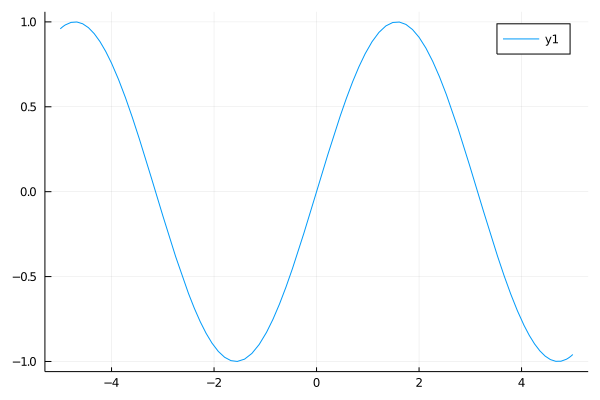

In [53]:
plot(h)

Dabei ist der Plot automatisch ein Liniendiagramm und Julia bestimmt selber, welcher Teil des Koordinatensystems genau geplottet wird.
Wir können auch bestimmen, welchen Teil wir sehen wollen, indem wir `xlim` und `ylim` verwenden und das gewünschte Intervall angeben.

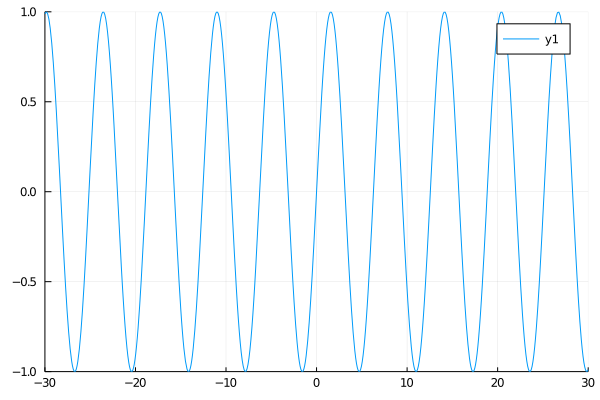

In [54]:
plot(h, xlim = (-30,30), ylim = (-1,1))

Wenn man möchte, kann man die Grafik mit den folgenden Befehlen beschriften. Die Reihenfolge spielt dabei keine Rolle.

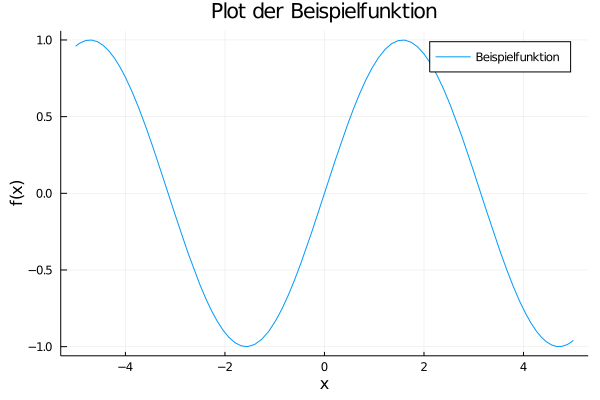

In [55]:
plot(h, label = "Beispielfunktion", xlabel = "x", ylabel = "f(x)", title = "Plot der Beispielfunktion")

Man kann auch einige kosmetische Veränderungen vornehmen, z.B. mit folgenden Befehlen:

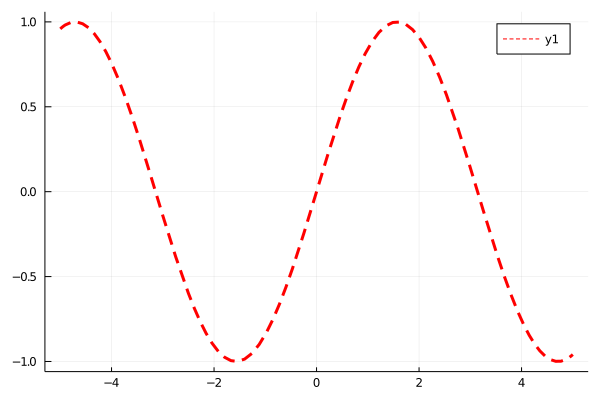

In [56]:
plot(h, linewidth = 3, linestyle =:dash, linecolor =:red)

Auch mehrere Funktionen sind in einem einzigen Plot darstellbar, indem bei der zweiten (und ggf. dritten, vierten,...) Funktion das <code>plot</code> durch ein <code>plot!</code> ersetzt wird.

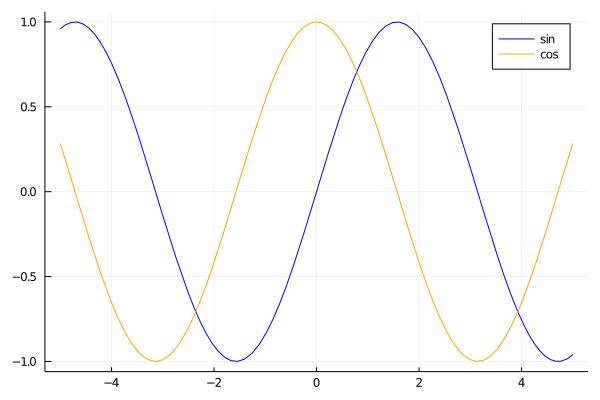

In [57]:
g = cos(x) #neue Funktion definieren

plot(h, linecolor =:blue, label = "sin")
plot!(g, linecolor =:orange, label = "cos") #beachten Sie das "!"

***

<div class="alert alert-block alert-success">
    
### Aufgabe 6
***

Plotten Sie folgende Funktionen in ein einziges Koordinatensystem:
<ul>
    <li> $f_1(x) = x^2 -10x + 16$ </li>
    <li> $f_2(x) = -x^2 + 15x - 50$ </li>
    <li> $f_3(x) = x^2 - 7x + 6$ </li>    
</ul>    
Nutzen Sie Liniendiagramme und sorgen Sie dafür, dass man die Funktionsgraphen gut unterscheiden kann und alle Nullstellen sichtbar sind. 

</div>


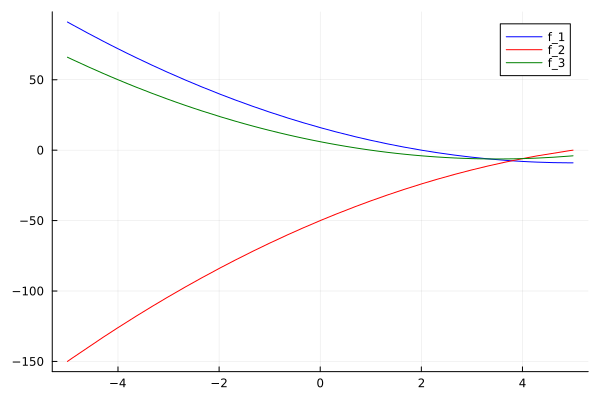

In [40]:
#LÖSUNG ZU 6

f_1 = x^2 - 10x + 16
f_2 = -x^2 + 15x - 50 
f_3 = x^2 - 7x + 6

plot(f_1, linecolor=:blue, label="f_1")
plot!(f_2, linecolor=:red, label="f_2")
plot!(f_3, linecolor=:green, label="f_3")

***

Julia kann nicht nur Liniendiagramme plotten. Auch Punktdiagramme sind darstellbar. Dazu benötigen wir zwei Arrays der gleichen Länge. Eins mit den Werten des Definitionsbereiches, das andere mit den dazugehörigen Bildern.

In [59]:
definitionsbereich = [0, 2, 4, 6, 8, 10]
bild = [2, 1, 0, 3, 5, 6]

6-element Array{Int64,1}:
 2
 1
 0
 3
 5
 6

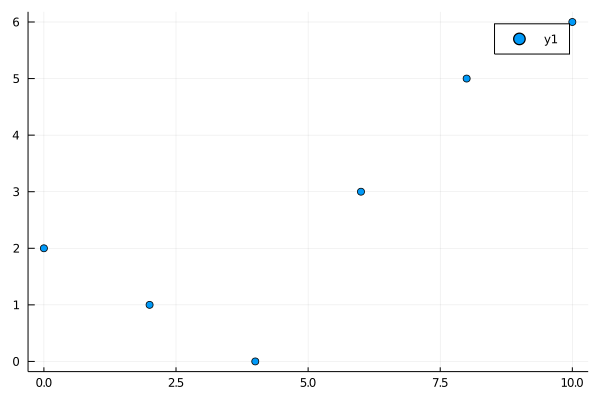

In [60]:
plot(definitionsbereich, bild, seriestype =:scatter)

Achten Sie darauf, zuerst das Array, welches auf die x-Achse aufgetragen werden soll einzugeben und dann das Array mit den Folgenwerten. Mit dem Stichwort `seriestype =:scatter` weiß Julia, dass ein Punktdiagramm entstehen soll. 
<br> Wir können statt Punkten auch andere Formen durch Verwendung des Befehls `shape` erzeugen. Natürlich sind die bereits eingeführten Befehle zur Beschriftung und kosmetischen Veränderung des Plots auch für Punktdiagramme verwendbar.

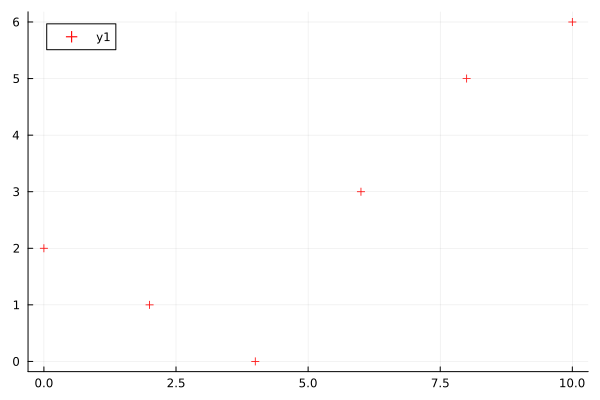

In [45]:
definitionsbereich = [0, 2, 4, 6, 8, 10]
bild = [2, 1, 0, 3, 5, 6]

plot(definitionsbereich, bild, seriestype =:scatter, shape =:+, color=:red)

Im Folgenden definieren wir eine Folge und plotten diese mit einem Punktdiagramm.

In [62]:
n = symbols("n") 
a = (2n^2 - n + 1)/(n^2 + 2n) #Folgenvorschrift definieren 

   2        
2⋅n  - n + 1
────────────
   2        
  n  + 2⋅n  

In [63]:
x = [i for i = 1:10] #Definiere x-Achsen-Daten in einem Array
y = [a(i) for i = 1:10] #Definiere y-Achsen-Daten in einem Array

10-element Array{Sym,1}:
     2/3
     7/8
   16/15
   29/24
   46/35
   67/48
   92/63
  121/80
    14/9
 191/120

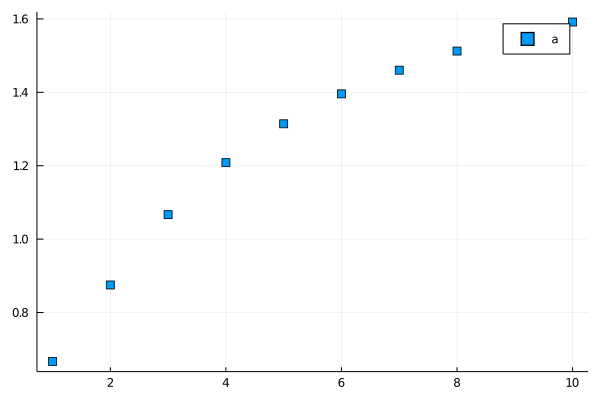

In [72]:
plot(x, y, seriestype =:scatter, shape =:rect, label = "a")

***

<div class="alert alert-block alert-success">
    
### Aufgabe 7
***

Gegeben sei die Summe $\sum_{k=0}^{n}  \frac{1}{k!}$. Plotten Sie den Wert dieser Summe für $n = 0, 1, ...,10$.


</div>


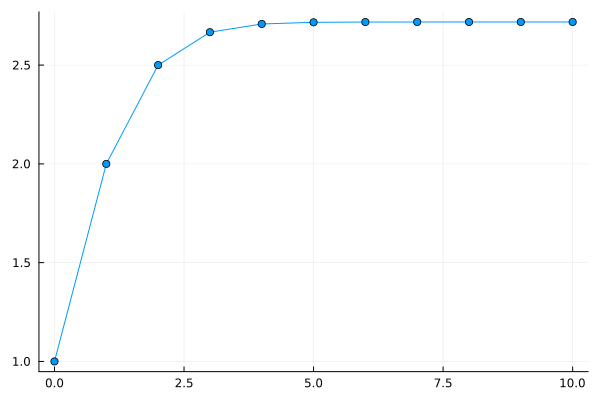

In [42]:
# LÖSUNG ZU 7 

n = 0:10
s = cumsum(1 ./ factorial.(n))

# Plot
plot(n, s, marker = :circle, legend = false)


***

## Komplexe Zahlen

In Julia können wir komplexe Zahlen wie folgt definieren:

In [66]:
a, b = symbols("a, b")
z = a + b*im

a + ⅈ⋅b

In [29]:
z1 = 3 + 4im  # 3 ist der Realteil und 4 ist der Imaginärteil.
z2 = 1 - 2im  # 1 ist der Realteil und -2 ist der Imaginärteil.

1 - 2im

`im` ist eine Konstante von Julia, welche die imaginäre Einheit repräsentiert. Wir können die Grundrechenarten wie gewohnt anwenden.

In [30]:
z1 = 3 + 4im  # 3 ist der Realteil und 4 ist der Imaginärteil.
z2 = 1 - 2im  # 1 ist der Realteil und -2 ist der Imaginärteil.

z3 = z1 + z2  # Addition
z4 = z1 - z2  # Subtraktion
z5 = z1 * z2  # Multiplikation
z6 = z1 / z2  # Division

-1.0 + 2.0im

Wir können mir `real()` und `imag()` auf den Real- bzw. Imaginärteil einer komplexen Zahl zugreifen.

In [69]:
real_part = real(z1)  # Gibt 3 aus
imag_part = imag(z1)  # Gibt 4 aus

4

Auch die komplexe Konjugation und der Absolutbetrag einer komplexen Zahl ist mit den Funktionen `conj()` und `abs()` abrufbar.

In [70]:
conjugate = conj(z1)  # Gibt 3 - 4im aus
absolutbetrag = abs(z1)   # Gibt 5.0 aus (sqrt(3^2 + 4^2))

5.0

***

<div class="alert alert-block alert-success">
    
### Aufgabe 8
***

Gegeben sind $x = 2+3i$ und $y = -1+5i$. Berechnen Sie mithilfe von Julia:  
<ul>
    <li> \(x+y\) </li>
    <li> \(x-y\) </li>
    <li> \(xy\) </li>
    <li> \(\frac{x}{y}\) </li>
    <li> \(\overline{y}\) </li>
</ul>
</div>

In [31]:
# LÖSUNG ZU AUFGABE 8
x = 2 + 3im
y = -1 + 5im

println(x + y)
println(x - y)
println(x/y)
println(conj(y))

1 + 8im
3 - 2im
0.5 - 0.5im
-1 - 5im


***